We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

<table>
  <tr>
    <th style="text-align: left">Feature</th>
    <th style="text-align: left">Description</th> 
  </tr>
  <tr>
    <td style="text-align: left">id</td>
    <td style="text-align: left">Unique ID for each home sold</td> 
  </tr>
  <tr>
    <td style="text-align: left">date</td>
    <td style="text-align: left">Date of the home sale</td> 
  </tr>
    <tr>
    <td style="text-align: left">price</td>
    <td style="text-align: left">Price of each home sold</td> 
  </tr>
    <tr>
    <td style="text-align: left">bedrooms</td>
    <td style="text-align: left">Number of bedrooms</td> 
  </tr>
    <tr>
    <td style="text-align: left">bathrooms</td>
    <td style="text-align: left">Number of bathrooms, where .5 accounts for a room with a toilet but no shower</td> 
  </tr>
    <tr>
    <td style="text-align: left">sqft_living</td>
    <td style="text-align: left">Square footage of the apartments interior living space</td> 
  </tr>
    <tr>
    <td style="text-align: left">sqft_lot</td>
    <td style="text-align: left">Square footage of the land space</td> 
  </tr>
    <tr>
    <td style="text-align: left">floors</td>
    <td style="text-align: left">Number of floors</td> 
  </tr>
    <tr>
    <td style="text-align: left">waterfront</td>
    <td style="text-align: left">A dummy variable for whether the apartment was overlooking the waterfront or not</td> 
  </tr>
    <tr>
    <td style="text-align: left">view</td>
    <td style="text-align: left">An index from 0 to 4 of how good the view of the property was</td> 
  </tr>
    <tr>
    <td style="text-align: left">condition</td>
    <td style="text-align: left">An index from 1 to 5 on the condition of the apartment</td> 
  </tr>
    <tr>
    <td style="text-align: left">grade</td>
    <td style="text-align: left">An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.</td> 
  </tr>
    <tr>
    <td style="text-align: left">sqft_above</td>
    <td style="text-align: left">The square footage of the interior housing space that is above ground level</td> 
  </tr>
    <tr>
    <td style="text-align: left">sqft_basement</td>
    <td style="text-align: left">The square footage of the interior housing space that is below ground level</td> 
  </tr>
    <tr>
    <td style="text-align: left">yr_built</td>
    <td style="text-align: left">The year the house was initially built</td> 
  </tr>
    <tr>
    <td style="text-align: left">yr_renovated</td>
    <td style="text-align: left">The year of the house’s last renovation</td> 
  </tr>
    <tr>
    <td style="text-align: left">zipcode</td>
    <td style="text-align: left">What zipcode area the house is in</td> 
  </tr>
    <tr>
    <td style="text-align: left">lat</td>
    <td style="text-align: left">Lattitude</td> 
  </tr>
    <tr>
    <td style="text-align: left">long</td>
    <td style="text-align: left">Longitude</td> 
  </tr>
    <tr>
    <td style="text-align: left">sqft_living15</td>
    <td style="text-align: left">The square footage of interior housing living space for the nearest 15 neighbors</td> 
  </tr>
    <tr>
    <td style="text-align: left">sqft_lot15</td>
    <td style="text-align: left">The square footage of the land lots of the nearest 15 neighbors</td> 
  </tr>
</table>

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,explained_variance_score
import math
#pip install xgboost
import xgboost
from sklearn.ensemble import RandomForestRegressor

### Import the data

In [2]:
kc_data = pd.read_csv('kc_house_data.csv')
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


It’s historical pricing data for house sales in King County, USA (where Seattle is).

---
# Exploratory Data Analysis

### Check for null values

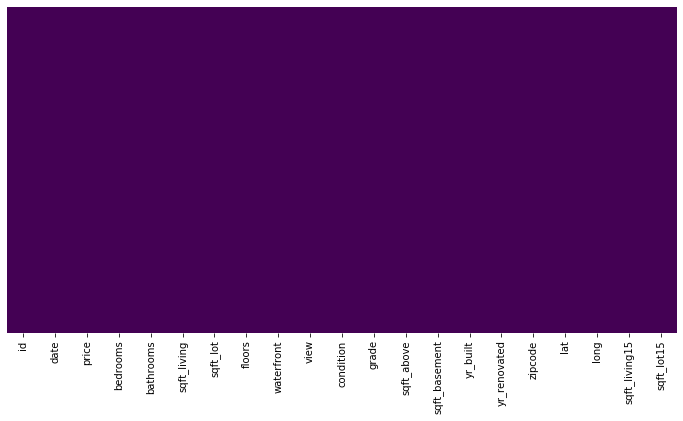

In [3]:
plt.figure(figsize=(12,6))
sns.heatmap(kc_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# we dont have null valures as we can see in the chart below

### Print the description of the data 
transpose the table so you'll see all the content

In [4]:
kc_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Print a distribution plot of the price column

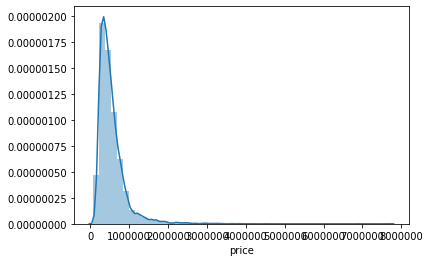

In [5]:
sns.distplot(kc_data['price'])

Most of the houses falls between 0 and around 1,500,000 dollars and we have extreme outliers for the really expensive houses.<br>
It make sense to drop those outliers in our analysis if they are just a few points that are very extreme.

### Print a countplot of the bedroom numbers

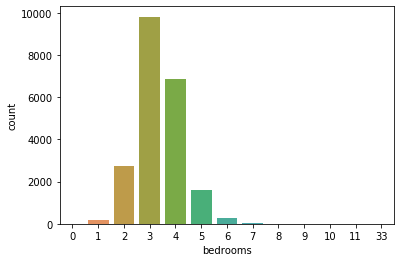

In [49]:
sns.countplot(x="bedrooms", data=kc_data)

It’s nice just comparing your label to some sort of feature that you think has a high correlation:

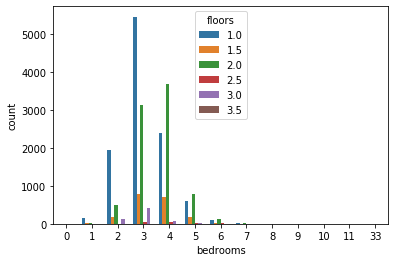

In [51]:
sns.countplot(x='bedrooms',hue='floors',data=kc_data)

### Print the correlations of the price column and sort the values

In [7]:
corr_matrix = kc_data.corr()
print(corr_matrix["price"].sort_values(ascending=False))

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


It looks like these square feet of living space has a very high correlation with the actual price of the house.<br>
It is recommended exploring highly correlated features with your label through a scatter plot.

### Print a scatterplot of the square feet living with the actual price

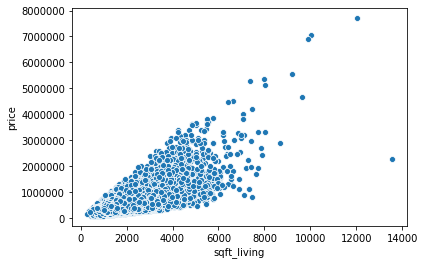

In [8]:
sns.scatterplot(data=kc_data, x="sqft_living", y="price")

### Print a boxplot to see the distribution of the bedroom category

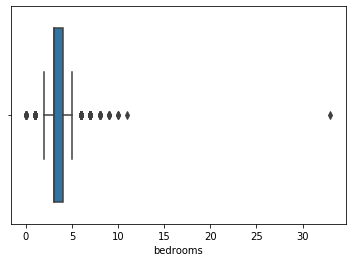

In [9]:
sns.boxplot(x=kc_data["bedrooms"])

---
## Geographical Properties

We should notice that in our dataset we have latitude and longitude, it’ll be interesting to explore this by plotting it out with a simple scatter plot.<br>
<strong><u>Notice:</u></strong><br> 
Seaborn doesn’t have built-in geographical plotting capabilities. There is a little bit of that with Matplotlib with some extensions plug in libraries, but we’re not going to focus on trying to plot these points on top of a real world map, instead we can gain a lot of information with a little bit of cursory knowledge of what King County looks like combined with a simple scatter plot call.



### Print a scatterplot of the longitude with the actual price

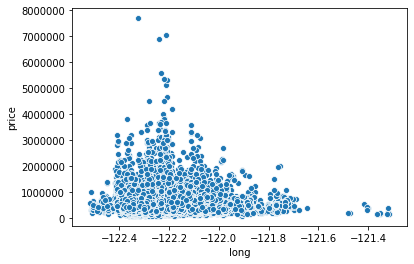

In [10]:
sns.scatterplot(data=kc_data, x="long", y="price")

We would expect to see kind of a flat blob between 0 and 1.5 million dollars if there was no price differentiation based off longitude, but it looks like there tends to be some sort of price distribution at certain longitude.<br> 
It looks like at longitude -122.2, that looks like an expensive housing area, you can see the distribution quite clearly.

### Repeat this for latitude

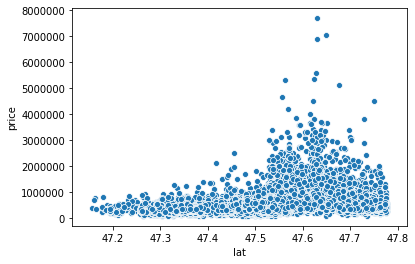

In [11]:
sns.scatterplot(data=kc_data, x="lat", y="price")

The same behavior seems to pop up. It also seems that in a particular latitude there’s some sort of expensive housing area.<br>
Basically, this is telling us is that it looks like at a certain combination of latitude and longitude that tends to be an expensive area.<br>
If we look at a King County map, we can begin to discern this:



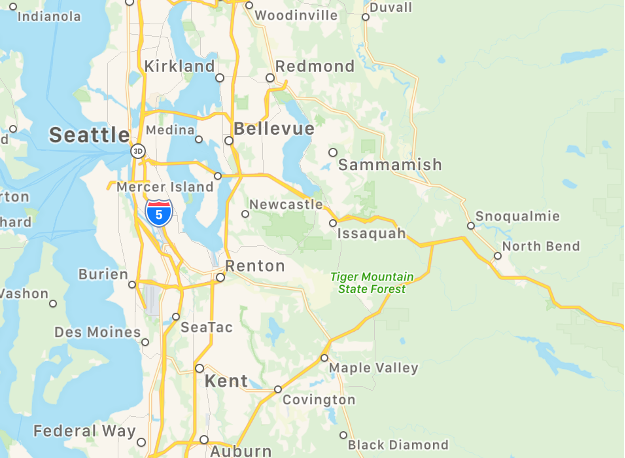

Let’s plot out latitude vs. longitude and plot all these points and then later on we can affect their hue.

### Print a scatterplot of the latitude and longitude against the price
hint: you need to use hue

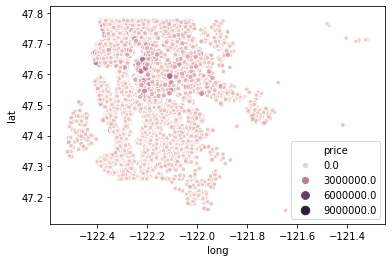

In [12]:
sns.scatterplot(data=kc_data,x="long",y="lat",hue="price",size="price")

However, it looks like we’re not getting quite a color gradient as we’d expected because of those really expensive outlier housing as well as the fact that we still have a marker edge.
Let’s see if we can clean up this map a little bit by dropping some of these outliers.

If we take a look at our distribution of the prices it looks like we should have a reasonable cutoff at 3 million dollars.

### Sort the values in descending order based off price

In [13]:
kc_data.price.sort_values(ascending=False)

7252     7700000.0
3914     7062500.0
9254     6885000.0
4411     5570000.0
1448     5350000.0
           ...    
8274       82000.0
16198      81000.0
465        80000.0
15293      78000.0
1149       75000.0
Name: price, Length: 21613, dtype: float64

We can sample out the top 1% of all houses.

### How many houses is 1% of all houses

In [14]:
kc_data[kc_data.price > kc_data.price.quantile(.99)].shape

(217, 21)

1% is 215 houses, which is quite a lot of houses.<br>
Let’s create another data frame and we’ll call this non top 1% percent or bottom 99%



### Create a new dataframe containing the bottom 99% of the data

In [15]:
new_kc_data = kc_data[kc_data.price < kc_data.price.quantile(.99)]

### Print a scatterplot of the latitude and longitude against the price
use the new dataframe, set the edgecolor to None, alpha to 0.2 and the palette to RdYlGn

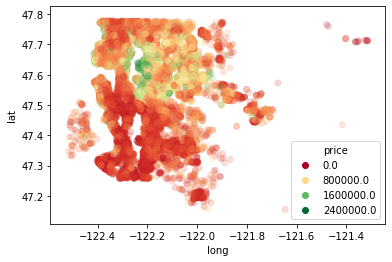

In [16]:
sns.scatterplot(data=new_kc_data,x="long",y="lat",hue="price",edgecolor=None,alpha=0.2,palette="RdYlGn")

Here we can see clearly where the expensive parts of King County are, and we can see the distribution really clearly. It almost looks like on the edge of the water there tends to be some lighter points, which makes sense because usually a waterfront property is going to be more expensive than inland property.

___
## Other Features

### Print a boxplot of the waterfront and not waterfront prices

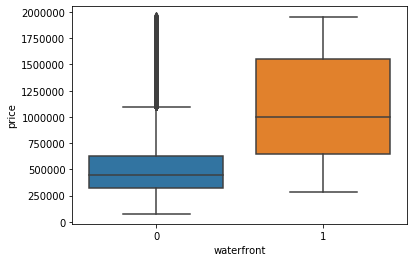

In [17]:
sns.boxplot(x="waterfront", y="price", data=new_kc_data)

It looks like if you’re on the waterfront you are more likely to be more expensive.

___
# Feature Engineering

Let’s go ahead and start our feature engineering process as well as get rid of features that are not going to be useful to us.

### Print the head of the original Dataframe

In [18]:
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Drop the ID column

In [19]:
kc_data = kc_data.drop(columns='id')
kc_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Take a look at the date column. what is the type of the column?

In [20]:
kc_data.dtypes
## date = object type

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Convert the date column to datetime object
hint: you can use to_datetime

In [21]:
kc_data['date']= pd.to_datetime(kc_data['date'])
kc_data.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

Once it’s a date time object, it means we can extract information such as months or years.

### Create 2 new columns for the year and month

In [22]:
kc_data['year'] = kc_data['date'].dt.year
kc_data['month'] = kc_data['date'].dt.month
kc_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


This is feature engineering because these features were technically hidden inside of the string date and now we’re creating new columns to try to extract or engineer more information off the original features.<br> 
This is a common step, especially with timestamps.<br>
Now we can do exploratory data analysis to see if these are useful features in general.<br>
Let’s see if there’s any variation based off the month that this is selling at, maybe we price things higher if we believe they’re going to go on market in December vs. in March.

### Print a boxplot of the prices per month

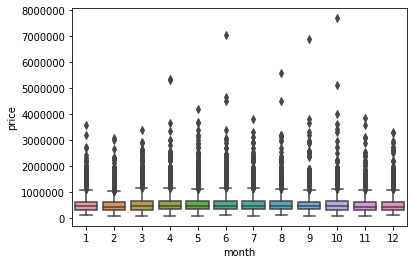

In [23]:
sns.boxplot(x="month", y="price", data=kc_data)

It’s hard to tell just from this plot whether or not there is any significant distribution differences between the month that you’re going to sell this house at.<br> 
What might be easier to do is just see the numbers themselves.

### Groupby the mean prices per month
hint: use the groupby method

In [24]:
kc_data.groupby('month')['price'].mean()

month
1     525870.889571
2     507851.371200
3     543977.187200
4     561837.774989
5     550768.785833
6     558002.199541
7     544788.764360
8     536445.276804
9     529253.821871
10    539026.971778
11    521961.009213
12    524461.866757
Name: price, dtype: float64

This may allow us to see or read the numbers to see if there’s some sort of significant difference between the months. 

### Plot the groupby above

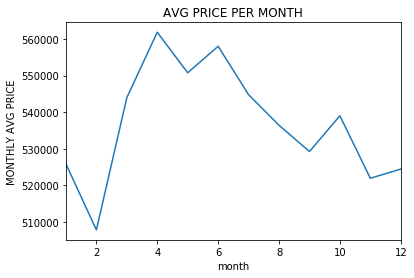

In [25]:
ax = kc_data.groupby('month')['price'].mean().plot.line()
ax.set_title("AVG PRICE PER MONTH")
ax.set_ylabel("MONTHLY AVG PRICE")
plt.show()

It looks like maybe there’s some sort of difference between the months, if we actually see the total of y range, it goes between 5.1 thousand to 5.6 thousand, so not a huge difference in the price, but it looks like there’s some behavior difference in the months themselves.

### Plot the groupby mean prices per year 

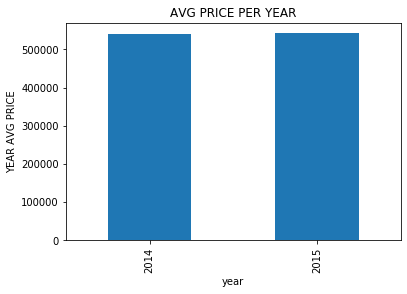

In [26]:
ax2 = kc_data.groupby('year')['price'].mean().plot.bar()
ax2.set_title("AVG PRICE PER YEAR")
ax2.set_ylabel("YEAR AVG PRICE")
plt.show()

This plot makes sense because if we look back at King County sales, they’re just increasing on price as time goes on and you’d expect that just naturally with inflation unless there’s some sort of a major housing event.

### Drop the date column

In [27]:
kc_data = kc_data.drop(columns='date')
kc_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


___
Something we want to take a note of is the zip code column. 

### Count the values of the zipcode column 

In [28]:
kc_data.zipcode.nunique

<bound method IndexOpsMixin.nunique of 0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21608    98103
21609    98146
21610    98144
21611    98027
21612    98144
Name: zipcode, Length: 21613, dtype: int64>

Notice the zip code is numerical and if we feed this directly into our model the model will assume that it’s some sort of continuous feature, that somehow zip code 98178 is greater than 98125, and this may or may not be the case depending how the zip codes are actually mapped out on a real map.<br>
This is where the domain experience comes into play. You’d have to either look up the maps yourself, you can do a quick google search and find some sort of zip code mapping on top of King County and see if there is a relationship between the numbers zip codes are assigned vs. maybe their latitude and longitude. You can also do that through some sort of correlation plot, but if you take a closer look at this there doesn’t seem to be a clear continuous distribution of these actual zip codes, which means you would want to start treating this as a categorical variable.

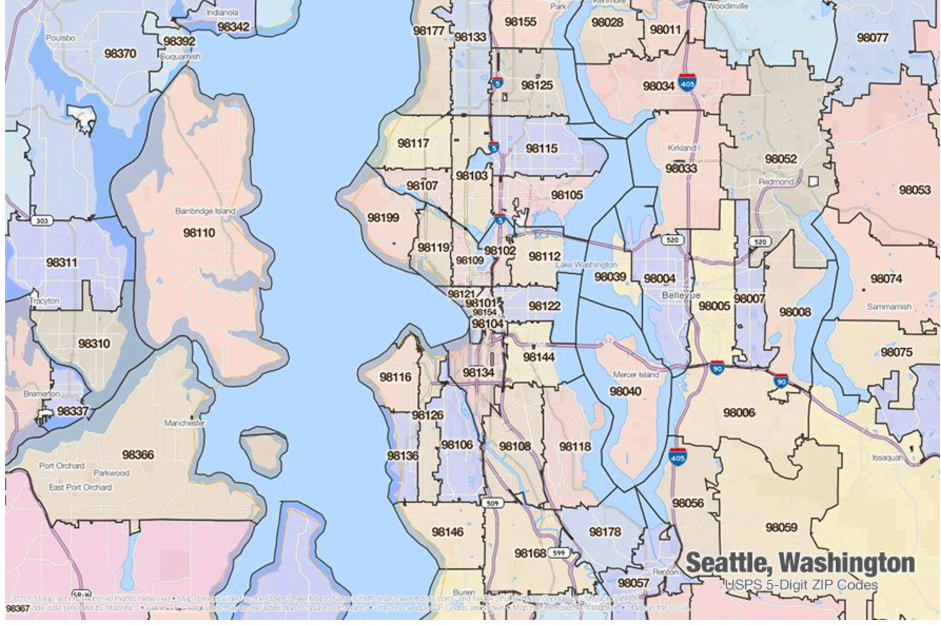

It looks like we have 70 unique zip codes so it’s too much to convert to dummy variable. We’ll drop the zip code column because 70 categories are just too much for us. However, we could have a little bit of domain experience and domain knowledge and categorize this based off what we know are expensive zip codes vs. less expensive zip codes, or we could do some sort of mapping or grouping to zip codes in the south, zip codes in the middle and zip codes in the north, but this will take a lot of manual work and a lot more experience of what King County is like.<br>
A big part of machine learning and data science is to contact someone with domain experience and try to get those mappings and feature engineering in place.<br>
For our case there’s 70 categories, so we’ll just ignore them for now. However, in a more realistic situation you’d probably want to take the time to look at a map and start mapping these out yourself manually. 



### Drop the zipcode column

In [29]:
kc_data = kc_data.drop(columns='zipcode')
kc_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


There are other things we can take a look at. Another one that may be kind of troublesome is year renovated. 

### Count the values of the year renovated column 

In [30]:
kc_data.yr_renovated.value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

Most of the values are 0, which implies that it was not renovated.<br>
There are different approaches we can take here, as far as feature engineering is concerned. One main issue is that 0 is not a year, instead it’s an indication that the house was not renovated, so it may make more sense to categorize this as renovated or nor renovated.<br>
We can take advantage of the situation by thinking of it in the following fashion, notice that it’s most likely the more recent the year of the renovation, the more likely that the house is going to have a higher sale price. Since 0 follows along with this correlation, it’s almost like the lowest year possible, then we should expect that to also have a little value.<br> 
In this case, we’re kind of lucky and due to the scaling from 0 to the highest year, higher should correlate with more value and we can just keep this as is. That’s the kind of lucky situation we find ourselves in, that the years happen to go in a positive direction and the higher years tend to correlate with more value, because the more recent a renovation just intuitively you expect that to have more value.



### Count the values of the squre feet of the basement column 

In [31]:
kc_data.sqft_basement.value_counts()

0       13126
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

Notice it has 0 for a lot of entries, and 0 most likely just means there is no basement there. We can see the values starting to go upwards etc. this make sense as a continuous variable, because we’d expect that there is no basement it will have less value than having an extremely large basement.

___
**A lot of times you’ll have to make the decision in feature engineering if you want to make a continuous variable categorical or just keep it as continuous. You have to think carefully if it’s valid to keep it as continuous.
Keep in mind that feature engineering and exploratory data analysis is pretty much always a necessary part of any good data science or machine learning project.**



___
# Split the Data

### Split the Data to train set and test set, set the test size to 30% and use a random state of 101
To make sure there’s no issues between Pandas data type and the Numpy numeric, we can request the values.<br>
If you state values, it returns back the Numpy array underneath the actual data frame.

In [32]:
y=kc_data.price
x=kc_data.drop('price',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
6560,3,2.50,1920,4534,2.0,0,0,3,8,1920,0,1986,0,47.7144,-122.204,1380,5100,2015,2
10802,4,2.50,2620,8331,2.0,0,0,3,9,2620,0,1991,0,47.4357,-122.159,2760,8174,2014,7
8989,3,2.50,1590,4094,2.0,0,0,3,7,1590,0,1991,0,47.6100,-122.293,1940,3924,2014,8
1761,5,2.75,2540,5022,1.0,0,0,4,8,1540,1000,1955,0,47.5593,-122.300,2510,5182,2014,7
5749,4,2.50,3830,11972,1.0,1,4,3,11,2370,1460,1981,0,47.7404,-122.284,3080,12297,2015,4


In [33]:
y_train.head()

6560      475000.0
10802     460000.0
8989      454000.0
1761      531000.0
5749     1850000.0
Name: price, dtype: float64

___ 
# Scaling the data
We want to do the scaling post-split, that way we only fit to the training set to prevent data leakage from the test set. <br>
We only doing transform on the test set because we don’t want to assume prior information about our test set.



### Import MinMaxScaler and instantiate the object

In [34]:
from sklearn import preprocessing
mms = preprocessing.MinMaxScaler()

### Fit transform the X_train

In [35]:
x_train = mms.fit_transform(x_train)

### Transform the X_test

In [36]:
x_test = mms.fit_transform(x_test)

### Check the shape of X_train and X_test

In [37]:
x_train.shape

(15129, 19)

In [38]:
x_test.shape

(6484, 19)

___
# Algorithm

### Choose an algorithm to check for the prices prediction, fit and predict
Decide what are the appropriate algorithm to solve this kind of problem<br>
**NOTE** - you learned in the previous course a few algorithms and you will learn more in your friends' seminars

In [39]:
model = []
R2 = []
RMSE = []

In [40]:
# LINEAR REGRESSION MODEL
LR = LinearRegression()
# training the model
LR.fit(x_train, y_train)
#Predicting the prices
LR_pred = LR.predict(x_test)

In [41]:
# XGboost regressor algorithm
xgb = xgboost.XGBRegressor()
# training the model
xgb.fit(x_train, y_train)
#Predicting the prices
predictions_XG = xgb.predict(x_test)

In [42]:
# RandomForest Regressor regressor algorithm
rf = RandomForestRegressor()
# training the model
rf.fit(x_train,y_train)
#Predicting the prices
rf_predict = rf.predict(x_test)

C:\Users\tal53\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


___
# Evaluation

### Use the correct evaluation metrics for the model you selected

In [43]:
#LR
print("Linear Regression R2 Score: ",r2_score(LR_pred,y_test))
print('RMSELinear Regression: ', np.sqrt(mean_squared_error(y_test,LR_pred)))
model.append("Linear Regression")
R2.append(r2_score(LR_pred,y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,LR_pred)))

#rf
print("Random Forest Regression R2 Score: ",r2_score(rf_predict,y_test))
print('RMSERandom Forest Regression: ', np.sqrt(mean_squared_error(y_test,rf_predict)))
model.append("Random Forest Regression")
R2.append(r2_score(rf_predict,y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,rf_predict)))

#xgb
print("Xgboost Regression R2 Score: ",r2_score(predictions_XG,y_test))
print('RMSE Xgboost Regression: ', np.sqrt(mean_squared_error(y_test,predictions_XG)))
model.append("Xgboost Regression")
R2.append(r2_score(predictions_XG,y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,predictions_XG)))

Linear Regression R2 Score:  0.6318818389501508
RMSELinear Regression:  228018.7962906216
Random Forest Regression R2 Score:  0.7954839561376426
RMSERandom Forest Regression:  188477.03692584322
Xgboost Regression R2 Score:  0.8163143232553618
RMSE Xgboost Regression:  188698.52971641245


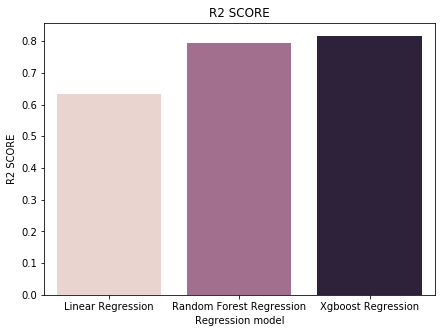

In [44]:
plt.subplots(figsize=(7, 5))
sns.barplot(y=R2,x=model,palette = sns.cubehelix_palette(len(R2)))
plt.xlabel("Regression model")
plt.ylabel("R2 SCORE")
plt.title('R2 SCORE')
plt.show()

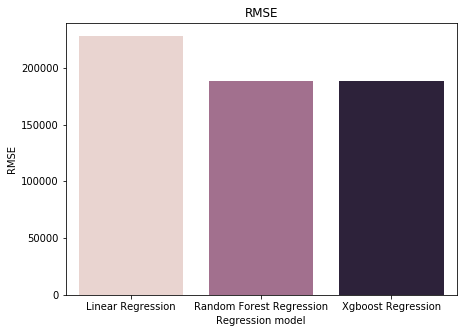

In [45]:
plt.subplots(figsize=(7, 5))
sns.barplot(y=RMSE,x=model,palette = sns.cubehelix_palette(len(RMSE)))
plt.xlabel("Regression model")
plt.ylabel("RMSE")
plt.title('RMSE')
plt.show()

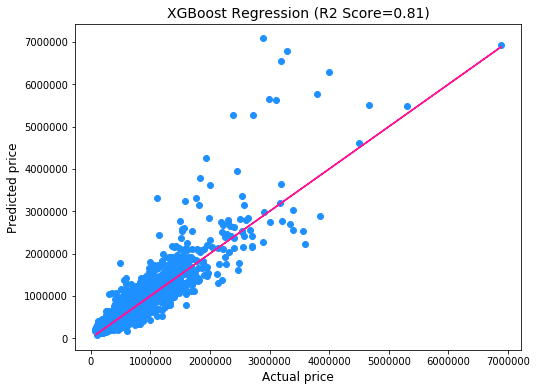

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predictions_XG, color='dodgerblue')
plt.plot(y_test,y_test, color='deeppink')
plt.xlabel('Actual price',fontsize=12)
plt.ylabel('Predicted price',fontsize=12)
plt.title('XGBoost Regression (R2 Score=0.81)',fontsize=14)
plt.show()

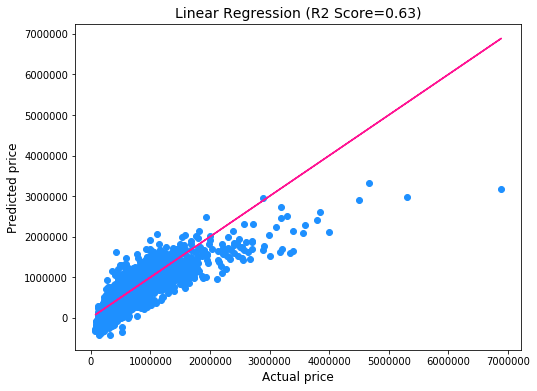

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=LR_pred, color='dodgerblue')
plt.plot(y_test,y_test, color='deeppink')
plt.xlabel('Actual price',fontsize=12)
plt.ylabel('Predicted price',fontsize=12)
plt.title('Linear Regression (R2 Score=0.63)',fontsize=14)
plt.show()

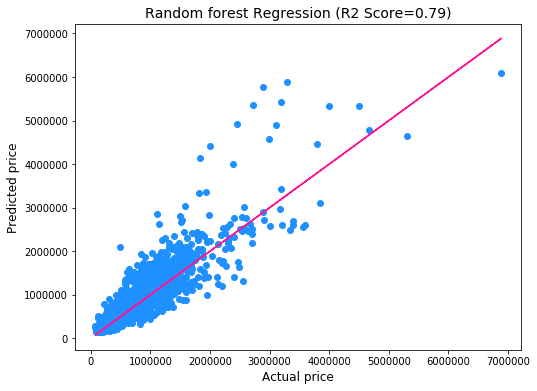

In [54]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=rf_predict, color='dodgerblue')
plt.plot(y_test,y_test, color='deeppink')
plt.xlabel('Actual price',fontsize=12)
plt.ylabel('Predicted price',fontsize=12)
plt.title('Random forest Regression (R2 Score=0.79)',fontsize=14)
plt.show()

We can see that for XGBoost, the R2 score is higher and RMSE is lower than those of Linear Regression and random forest Regression.

We implemented XGBoost algorithm and obtained RMSE and R2 Score of 188,698 and 0.81.
We built a models by Random forest and Linear Regression and obtained RMSE of 188,477 and 228,018, and R2 Score 0.63 and 0.69.
The XGBoost regression model was more successful in predicting the house prices.